In [11]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


train_df = pd.read_csv("../test/AC/trein.csv")

valid_df = pd.read_csv("../test/AC/val.csv")

убираем 0 чтобы их стало столькоже сколько и едениц едениц в файле 66

In [12]:
df_ones = valid_df[valid_df['target'] == 1]

df_zeros = valid_df[valid_df['target'] == 0].head(66)

filtered_df = pd.concat([df_zeros, df_ones])

valid_df = filtered_df.reset_index(drop=True)
valid_df

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,1,2,0,0,16,0.0,0.0,0.0,0.0,0.0,...,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,0.256919
1,2,4,0,0,18,0.0,0.0,1.0,1.0,1.0,...,360.0,360.0,360.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,0.267221
2,2,9,0,0,93,0.0,0.0,0.0,0.0,0.0,...,348.0,348.0,348.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,0.257217
3,0,12,0,0,108,0.0,0.0,0.0,0.0,0.0,...,300.0,300.0,300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.256261
4,0,14,0,0,120,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,7737230.5,7603419.5,7687750.0,10391000.0,10391000.0,10391000.0,0.257348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0,2228,1,0,2160,0.0,0.0,0.0,0.0,0.0,...,300.0,300.0,300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.291006
128,0,3256,1,0,773,0.0,0.0,0.0,0.0,1.0,...,360.0,360.0,360.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.264948
129,0,1150,1,0,2223,0.0,0.0,0.0,0.0,0.0,...,300.0,300.0,300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.339800
130,1,1150,1,0,2223,0.0,1.0,1.0,1.0,1.0,...,240.0,240.0,240.0,4717500.0,4717500.0,4717500.0,4717500.0,4717500.0,4717500.0,0.339800


делаем модельку чтобы проверить или смы правильно разобрались с моделькой и оне не угадывает только 0 если знавчение больше 50 то она угадывает не только 0 но и 1

In [13]:
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_val = valid_df.drop(columns=['target'])
y_val = valid_df['target']
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'objective': 'binary:logistic',
    'max_depth': 1,  # Увеличиваем глубину деревьев
    'learning_rate': 0.1,  # Уменьшаем скорость обучения
    'n_estimators': 100,  # Большее количество итераций
    'subsample': 0.6,  # Используем только часть данных на каждой итерации
    'colsample_bytree': 0.8,  # Используем часть признаков
    'gamma': 1,  # Добавляем регуляризацию
    'random_state': 1
}

In [14]:
model = xgb.train(params, dtrain, num_boost_round=100)

C:\Users\josha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:47:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [15]:
y_prob = model.predict(dval)

fpr, tpr, trashers = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

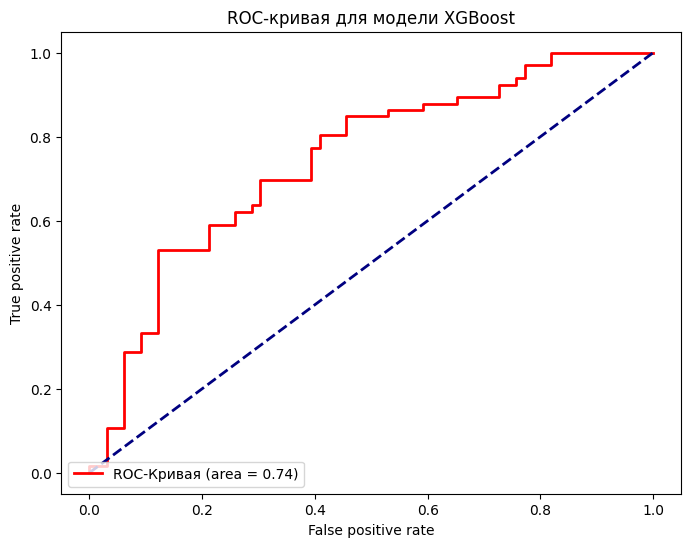

In [16]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC-Кривая (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-кривая для модели XGBoost')
plt.legend(loc='lower left')
plt.show()

мы увидели что мы все верно делаем в основном файле и все работает как и должно 